# Ch6-3. 산점도 그리기

`pyplot.scatter` 함수를 이용하여 산점도를 그릴 수 있다. 

> x, y : x, y 축에 들어갈 값(iterable한 객체여야 하며, x[i], y[i]가 하나의 점이 되므로 길이가 같아야 한다.)  
marker : 마커 종류  
markersize : 마커 크기  
color : 마커 색상  
label : 범례(legend를 찍었을 때 해당 선에 대한 범례가 찍히며, string으로 정의해야 함)

## Pandas 객체의 method를 이용한 산점도 그리기
DataFrame.plot() 함수를 사용하면 DataFrame을 사용한 그래프를 손쉽게 그릴 수 있으며, 산점도 역시 그릴 수 있다. 

> kind : 그래프 종류 (line이면 선 그래프를 그림)  
x : x축에 들어갈 컬럼명 (입력하지 않으면 index가 x축에 들어감. 하나만 들어감.)  
y : y축에 들어갈 컬럼명 (목록 가능, 하나 이상이 될 수 있음.)  
xticks, yticks 등도 설정 가능하나 pyplot을 사용해서도 설정이 가능하다. 다 그려놓은 후에 matplotlib의 pyplot을 이용하여 그리는 것이 효율적이다.  

## 경로 설정

In [1]:
import pandas as pd
import os
os.chdir(r"/Users/Angela/Desktop/과속대학쿠쿠루/1. 데이터 핸들링/데이터")

In [2]:
df = pd.read_csv("판매실적통합본.csv", encoding = "cp949")
df.head()

,년도(year),월(month),분기(4),일자(day),주차별 편중도,출하일,대리점,지역 구분,내수/수출 구분,제품군,수량
0,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,12
1,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,4
2,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,1
3,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 5,122
4,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,20


## matplotlib 환경설정 

In [3]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (8, 5)

## 분기와 대리점에 따른 수량의 합계 구하기

연도별 분기로 분류가 필요하기 때문에 연도와 분기를 이어 붙이도록 한다.  
string은 + 로 붙일 수 있다. 더하기 위해 자료형을 string으로 전부 바꾼 다음 바꿀 수 있다.  
분기를 새로운 변수로 만들어 준다.

In [4]:
# 년도 - 분기를 잇는 새로운 변수 생성

df['분기'] = df['년도(year)'].astype(str) + '-' + df['분기(4)'].astype(str)
df['분기'].sample(5)

41288     2017-2분기
61383     2017-4분기
104485    2019-2분기
79849     2018-2분기
34865     2017-1분기
Name: 분기, dtype: object

주의!! 사용하려는 변수가 둘 이상이 될 경우 `as_index = True` 일 경우 멀티인덱스로 들어간다.  
다루는 것이 쉽지만은 않기 때문에 False로 두고 column 인 상태로 분석하도록 하려 한다.  

In [5]:
grouped_df1 = df.groupby(['분기', '대리점'], as_index = False)['수량'].sum()
grouped_df1

,분기,대리점,수량
0,2016-1분기,대리점 1,39934
1,2016-1분기,대리점 10,4525
2,2016-1분기,대리점 2,19787
3,2016-1분기,대리점 3,24723
4,2016-1분기,대리점 4,9010
...,...,...,...
145,2019-3분기,대리점 5,82314
146,2019-3분기,대리점 6,6252
147,2019-3분기,대리점 7,30405
148,2019-3분기,대리점 8,10096


## pyplot을 이용한 그래프 그리기

두 개의 조건을 이용하면서 한쪽이 다른 한쪽의 unique 개수에 영향을 받은 상태이기 때문에,  
unique를 하지 않게 되면 각 분기가 대리점 개수만큼 늘어나 출력이 되게 된다.  

x축의 위치는 unique 한 분기의 개수를 range에 넣어 위치를 잡는다.  

특정 대리점인 데이터만 가져와서 차례대로 그래프를 그리도록 하기 위해 반복문을 사용한 상태이다. 


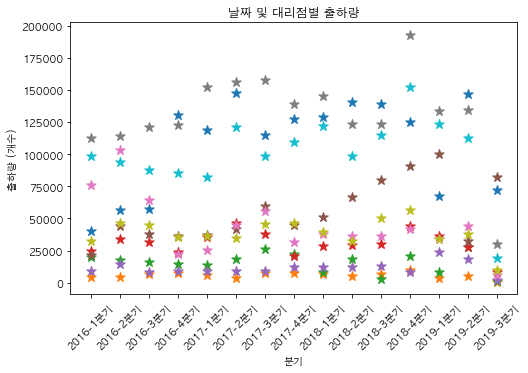

In [6]:
# 그래프 기본 설정
plt.title("날짜 및 대리점별 출하량")
plt.xlabel("분기")
plt.ylabel("출하량 (개수)")

xtick_range = range(len(grouped_df1['분기'].unique()))
xtick_label = grouped_df1['분기'].unique()
plt.xticks(xtick_range, xtick_label, rotation = 45)

# 반복문으로 각 대리점 
for agent in grouped_df1['대리점'].unique():
    cond = grouped_df1['대리점'] == agent
    # 분기를 x축, 수량을 y축이 되도록 그린다.
    plt.scatter(grouped_df1.loc[cond]['분기'], 
                grouped_df1.loc[cond]['수량'], 
                s = 100, marker = '*')

## DataFrame을 이용하여 그래프 그리기

이전에 groupby 한 데이터프레임을 pivot_table을 사용한다. 분기가 대리점마다 늘어난 상태이므로, 인덱스로 분기를 컬럼을 대리점, 값은 수량의 합계를 출력하도록 한다.  



In [7]:
grouped_df1.head() 
# 대리점별로 데이터를 나누거나, pivot을 해야만 df.plot을 이용하기 적합해짐

,분기,대리점,수량
0,2016-1분기,대리점 1,39934
1,2016-1분기,대리점 10,4525
2,2016-1분기,대리점 2,19787
3,2016-1분기,대리점 3,24723
4,2016-1분기,대리점 4,9010


In [8]:
pivot_df = pd.pivot_table(data = grouped_df1, values = '수량', index = '분기',
                         columns = '대리점', aggfunc = 'sum')
# 대리점명이 전부 컬럼으로 되기 때문에, suffix로 내용을 추가시켜 이름을 붙인다
pivot_df = pivot_df.add_suffix(" 출하량")

pivot_df

대리점,대리점 1 출하량,대리점 10 출하량,대리점 2 출하량,대리점 3 출하량,대리점 4 출하량,대리점 5 출하량,대리점 6 출하량,대리점 7 출하량,대리점 8 출하량,대리점 9 출하량
분기,,,,,,,,,,
2016-1분기,39934,4525,19787,24723,9010,21249,76005,112276,32743,98266
2016-2분기,56799,4519,17783,34247,14592,43818,103226,114176,46088,93726
2016-3분기,57184,6701,15878,31367,8300,37634,63977,120829,44548,87417
2016-4분기,130682,7704,14592,23857,8780,36622,22512,122822,35805,85516
2017-1분기,119085,6027,13951,35692,9375,37151,25148,152077,36627,82569
2017-2분기,147784,3780,18633,46604,9357,41749,45136,155935,34654,120782
2017-3분기,114819,7356,25919,37974,9397,59254,56074,157376,45479,98911
2017-4분기,126994,7853,22245,21024,11952,44728,31915,138685,46461,109366
2018-1분기,129271,6554,8176,28597,12280,51422,38133,144976,39479,121972


### 주의: 산점도는 x축도 
scatter plot을 사용할 것이기 때문에 x축이 적확한 숫자로 된 값을 가지고 있어야 위치를 찍을 수 있게 된다. 분기에 각각 유니크한 숫자를 갖도록 리스트를 만들어 데이터프레임에 넣어준다. 

In [9]:
# x축에 사용하기 위해 임의의 변수를 생성한다 숫자만 포함되어 있다. 
pivot_df['분기'] = list(range(len(pivot_df)))
pivot_df['분기'].head()

분기
2016-1분기    0
2016-2분기    1
2016-3분기    2
2016-4분기    3
2017-1분기    4
Name: 분기, dtype: int64

([<matplotlib.axis.XTick at 0x7fc5c2784610>,
 [Text(0, 0, '2016-1분기'),
  Text(1, 0, '2016-2분기'),
  Text(2, 0, '2016-3분기'),
  Text(3, 0, '2016-4분기'),
  Text(4, 0, '2017-1분기'),
  Text(5, 0, '2017-2분기'),
  Text(6, 0, '2017-3분기'),
  Text(7, 0, '2017-4분기'),
  Text(8, 0, '2018-1분기'),
  Text(9, 0, '2018-2분기'),
  Text(10, 0, '2018-3분기'),
  Text(11, 0, '2018-4분기'),
  Text(12, 0, '2019-1분기'),
  Text(13, 0, '2019-2분기'),
  Text(14, 0, '2019-3분기')])

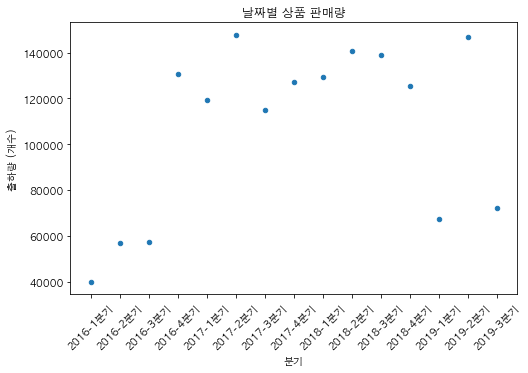

In [10]:
pivot_df.plot(kind = 'scatter', x = '분기', y = '대리점 1 출하량')
plt.title("날짜별 상품 판매량")
plt.xlabel("분기")
plt.ylabel("출하량 (개수)")

# 눈금을 정해주고 각 눈금에 분기를 라벨로 정의
xtick_range = range(len(grouped_df1['분기'].unique()))
xtick_label = grouped_df1['분기'].unique()

plt.xticks(xtick_range, xtick_label, rotation = 45)

# Ch6-4. 막대 차트 그리기

`pyplot.bar` 함수를 이용하면 막대 차트를 그릴 수 있다.

주요 입력  
> x :  막대의 위치  
height : 막대의 높이  
width : 막대의 너비(나중에 이 부분을 조정하는 일이 많을 것)  
align : 막대 정렬  

## Pandas 객체의 method를 이용한 막대 차트 그리기

DataFrame.plot() 함수를 사용하면 DataFrame을 사용한 그래프를 손쉽게 그릴 수 있으며, 막대 차트 역시 그릴 수 있다.

주요 입력  
> kind : 그래프 종류 ('bar'이면 막대 그래프를 그림)  
x : x축에 들어갈 컬럼명 (입력하지 않으면 index가 x축에 들어감. 하나만 들어감.)  
y : y축에 들어갈 컬럼명 (목록 가능, 하나 이상이 될 수 있음.)  
xticks, yticks 등도 설정 가능하나 pyplot을 사용해서도 설정이 가능하다. 다 그려놓은 후에 matplotlib의 pyplot을 이용하여 그리는 것이 효율적이다.  



In [11]:
df = pd.read_csv("판매실적통합본.csv", encoding = "cp949")
df.head()

,년도(year),월(month),분기(4),일자(day),주차별 편중도,출하일,대리점,지역 구분,내수/수출 구분,제품군,수량
0,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,12
1,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,4
2,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,1
3,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 5,122
4,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,20


## 제품군에 따른 수량의 합계


In [12]:
grouped_df2 = df.groupby(['제품군'], as_index = False)['수량'].sum()
grouped_df2

,제품군,수량
0,제품 1,2690307
1,제품 2,4223384
2,제품 3,531946
3,제품 4,277193
4,제품 5,126323
5,제품 6,262774


In [13]:
# 그래프 기본 설정
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (8, 5)

<BarContainer object of 6 artists>

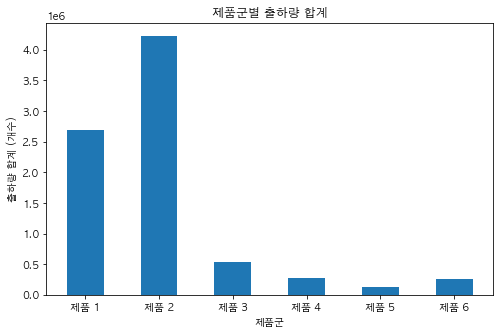

In [14]:
# 제품군별 출하량 합계 계산

plt.title("제품군별 출하량 합계")
plt.xlabel("제품군")
plt.ylabel("출하량 합계 (개수)")
plt.bar(grouped_df2['제품군'], grouped_df2['수량'], width = 0.5)

## 다중 막대 그래프 그리기

다중 막대그래프는 pandas의 groupby 혹은 set_index, 그리고 unstack, 혹은 pivot_table을 사용하면 쉽게 그릴 수 있다.